# College admisssions

From the data collected can we predict if a student will get placed or not 

## Investigation of structure, quality and content

Overall, the EDA approach is very iterative. At the end of every investigation we might discover something that will require us to redo everything once more. That is normal! But to impose at least a little bit of structure, I will be following few steps for investigations:

1. **Structure investigation**: Exploring the general shape of the dataset, as well as the data types of data features.
2. **Quality investigation**: Get a feeling for the general quality of the dataset, with regards to duplicates, missing values and unwanted entries.
3. **Content investigation**: Once the structure and quality of the dataset is understood, we can go ahead and perform a more in-depth exploration on the features values and look at how different features relate to each other.

But first we need to find an interesting dataset. Let's go ahead and load the "Deans Dilema Data"

In [3]:
df=pd.read_excel('IMB 485 Deans Dilemma Data.xlsx',engine='openpyxl')
df[:5]

,SlNo,Gender,Gender-B,Percent_SSC,Board_SSC,Board_CBSE,Board_ICSE,Percent_HSC,Board_HSC,Stream_HSC,...,Percentile_ET,Percent_MBA,S-TEST*SCORE,Specialization_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Placement,Placement_B,Salary
0,1,M,0,62.00,Others,0,0,88.00,Others,Commerce,...,55.0,58.80,55.0,Marketing & HR,50,65,74,Placed,1,270000
1,2,M,0,76.33,ICSE,0,1,75.33,Others,Science,...,86.5,66.28,86.5,Marketing & Finance,69,70,75,Placed,1,200000
2,3,M,0,72.00,Others,0,0,78.00,Others,Commerce,...,0.0,52.91,0.0,Marketing & Finance,50,61,59,Placed,1,240000
3,4,M,0,60.00,CBSE,1,0,63.00,CBSE,Arts,...,75.0,57.80,75.0,Marketing & Finance,54,66,62,Placed,1,250000
4,5,M,0,61.00,CBSE,1,0,55.00,ISC,Science,...,66.0,59.43,66.0,Marketing & HR,52,65,67,Placed,1,180000


#### 1.0.1 Structure Investigation

Before looking at the content of our feature matrix $X$, let's first look at the general structure of the dataset. For example, how many columns and rows does the dataset have?

In [4]:
df.shape

(391, 26)

So we know that this dataset has 391 samples and 26 features. And how many different data types do these 67 features contain?

In [5]:
pd.value_counts(df.dtypes)

int64      12
object      8
float64     6
dtype: int64

Looking at the data, we now know there are partially encoded columns like Board_CBSE, Board_ICSE of Board_SSC categorical variable also Degree_Engg from the Course_Degree categorical variable, missing out proper encoding of all the category types of a feature. Which we need to drop and encode them with one hot encoding correctly. 

</t>Also there are Encoded columns for gender and placement with Gender-B and Placement-B, of which the categorical features can be dropped.

We will create a copy of the original data into a new variable and perform cleaning and encoding on the newly created DataFrame

#### 1.0.1.1 Structure of non-numerical features

Data types can be numerical and non-numerical. First, let's take a closer look at the **non-numerical** entries.

In [6]:
# Display non-numerical features
df.select_dtypes(exclude="number").head()

,Gender,Board_SSC,Board_HSC,Stream_HSC,Course_Degree,Entrance_Test,Specialization_MBA,Placement
0,M,Others,Others,Commerce,Science,MAT,Marketing & HR,Placed
1,M,ICSE,Others,Science,Computer Applications,MAT,Marketing & Finance,Placed
2,M,Others,Others,Commerce,Engineering,NaN,Marketing & Finance,Placed
3,M,CBSE,CBSE,Arts,Management,MAT,Marketing & Finance,Placed
4,M,CBSE,ISC,Science,Engineering,MAT,Marketing & HR,Placed


Using the `.describe()` function we can also investigate how many unique values each non-numerical feature has and with which frequency the most prominent value is present.

In [8]:
df.describe(exclude="number")

,Gender,Board_SSC,Board_HSC,Stream_HSC,Course_Degree,Entrance_Test,Specialization_MBA,Placement
count,391,391,391,391,391,324,391,391
unique,2,3,3,3,7,8,3,2
top,M,Others,Others,Commerce,Management,MAT,Marketing & Finance,Placed
freq,264,201,247,222,163,265,222,312


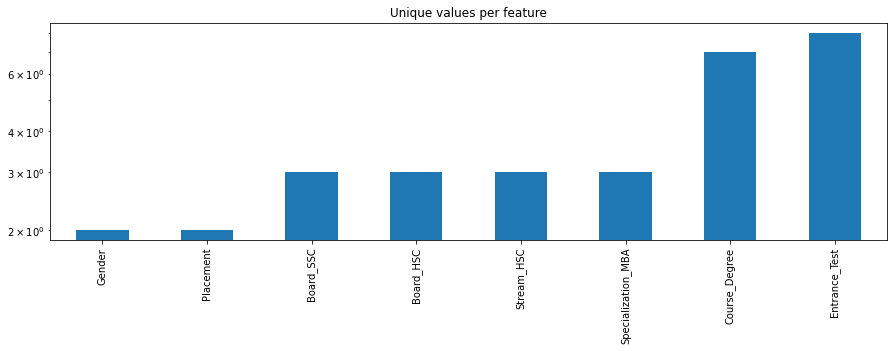

In [9]:
# For each numerical feature compute number of unique entries
unique_values = df.select_dtypes(
  exclude="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4),
                       title="Unique values per feature");

#### 1.0.2. Structure of numerical features

Next, let's take a closer look at the numerical features. More precisely, let's investigate how many unique values each of these feature has. This process will give us some insights about the number of **binary** (2 unique values), **ordinal** (3 to ~10 unique values) and **continuous** (more than 10 unique values) features in the dataset.

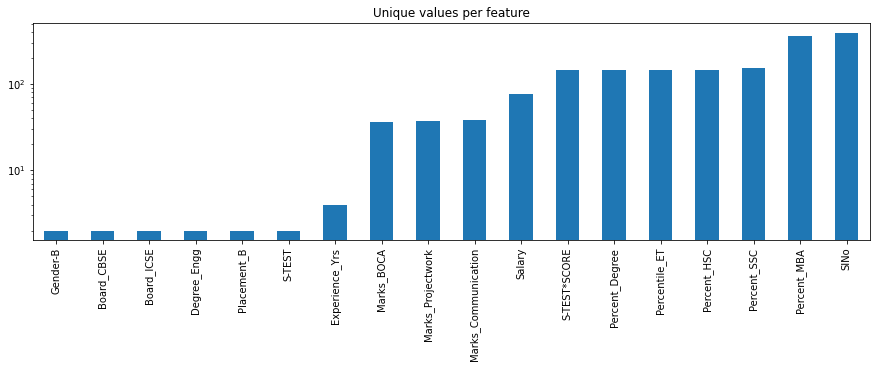

In [10]:
# For each numerical feature compute number of unique entries
unique_values = df.select_dtypes(
  include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar(logy=True, figsize=(15, 4),
                       title="Unique values per feature");

#### 1.0.3. Conclusion of structure investigation

At the end of this first investigation, we have a better understanding of the general structure of our dataset. Number of samples and features, what kind of data type each feature has, and how many of them are binary, ordinal, categorical or continuous. 

#### 2. Quality Investigation

Before focusing on the actual content stored in these features, let's first take a look at the general quality of the dataset. The goal is to have a global view on the dataset with regards to things like duplicates, missing values and unwanted entries or recording errors.

#### 2.1. Duplicates

Duplicates are entries that represent the same sample point multiple times. For example, if a measurement was registered twice by two different people. Detecting such duplicates is not always easy, as each dataset might have a unique identifier (e.g. an index number or recording time that is unique to each new sample) which you might want to ignore first.

In [9]:
# Check number of duplicates while ignoring the dependant feature
n_duplicates = df.drop(labels=["Placement_B"], axis=1).duplicated().sum()
print(f"We have {n_duplicates} duplicates in the database.")

#  Extract column names of all features, except 'Placement_B'
columns_to_consider = df.drop(labels=["Placement_B"], axis=1).columns

# Drop duplicates based on 'columns_to_consider'
df_X = df.drop_duplicates(subset=columns_to_consider)
df_X.shape



We have 0 duplicates in the database.


(391, 26)

#### 2.2. Missing values

Another quality issue worth to investigate are missing values. Having some missing values is normal. What we want to identify at this stage are big holes in the dataset, i.e. samples or features with a lot of missing values.

#### 2.2.1. Per sample

To look at number of missing values per sample we have multiple options. The most straight forward one is to simply visualize the output of `df_X.isna()`, with something like this:

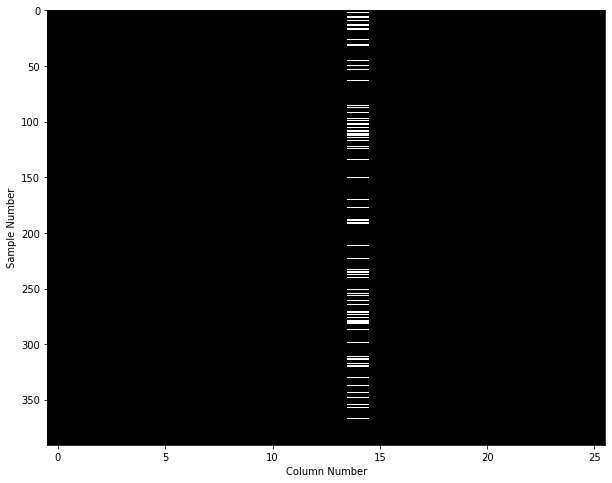

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

This figure shows on the y-axis each of the 391 individual samples, and on the x-axis if any of the 26 features of the original data contains a missing value. While this is already a useful plot, an even better approach is to use the [missingno](https://github.com/ResidentMario/missingno) library, to get a plot like this one:

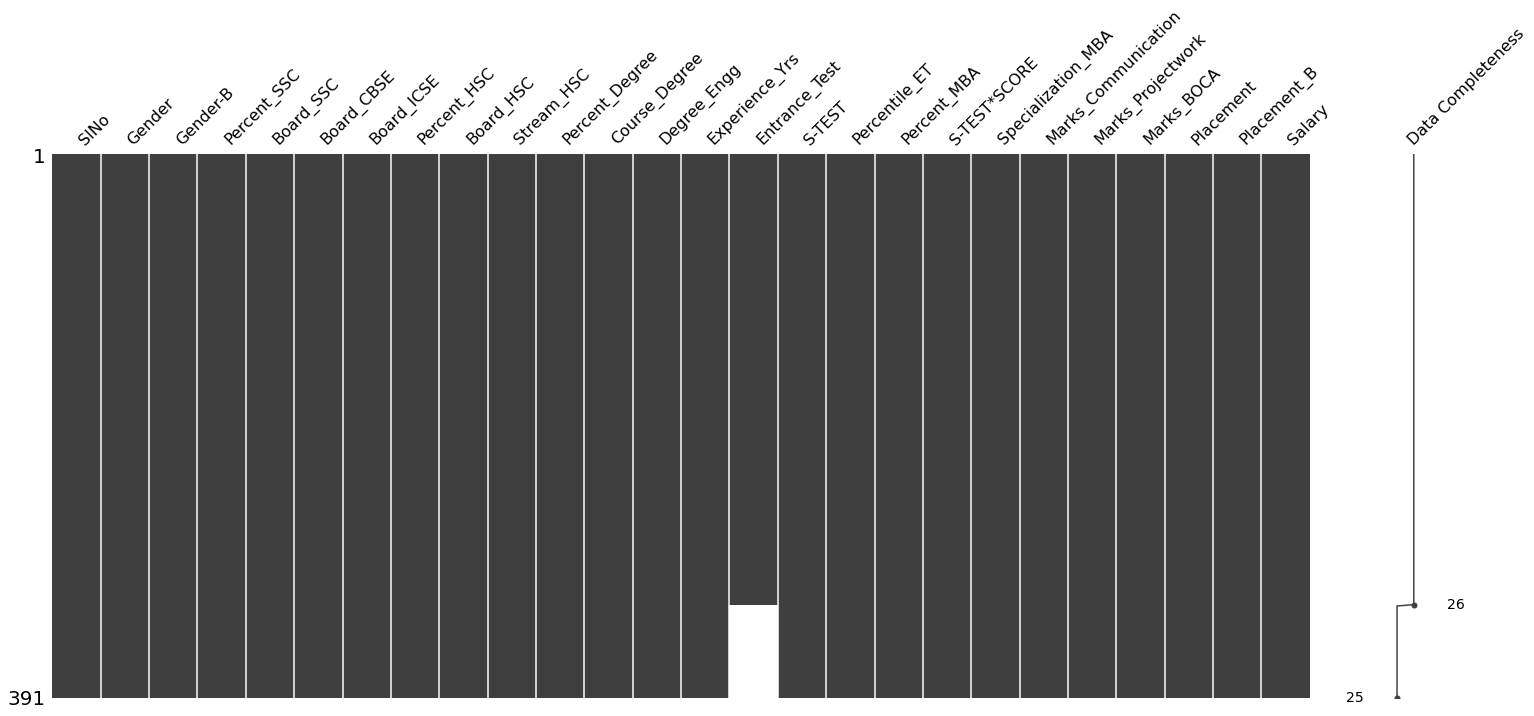

In [11]:
import missingno as msno

msno.matrix(df,labels=True, sort="descending");

### 2.2.2. Per Feature

As a next step, let's now look at the number of missing values per feature. For this we can use some `pandas` trickery to quickly identify the ratio of missing values **per feature**.

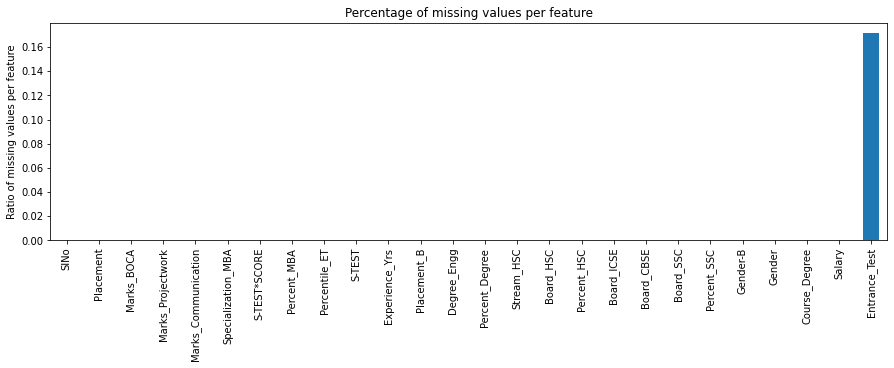

In [12]:
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

From both of these plots we can see that the dataset has a huge hole, caused by some samples where more than 16% of the feature (Entrance_test) values are missing. For those samples, filling the missing values with some replacement values is a good idea. If they were more than 20% we would have gone with dropping those records.

### 2.3.1. Numerical features

To plot this global view of the dataset, at least for the numerical features, you can use pandas' `.plot()` function and combine it with the following parameters:

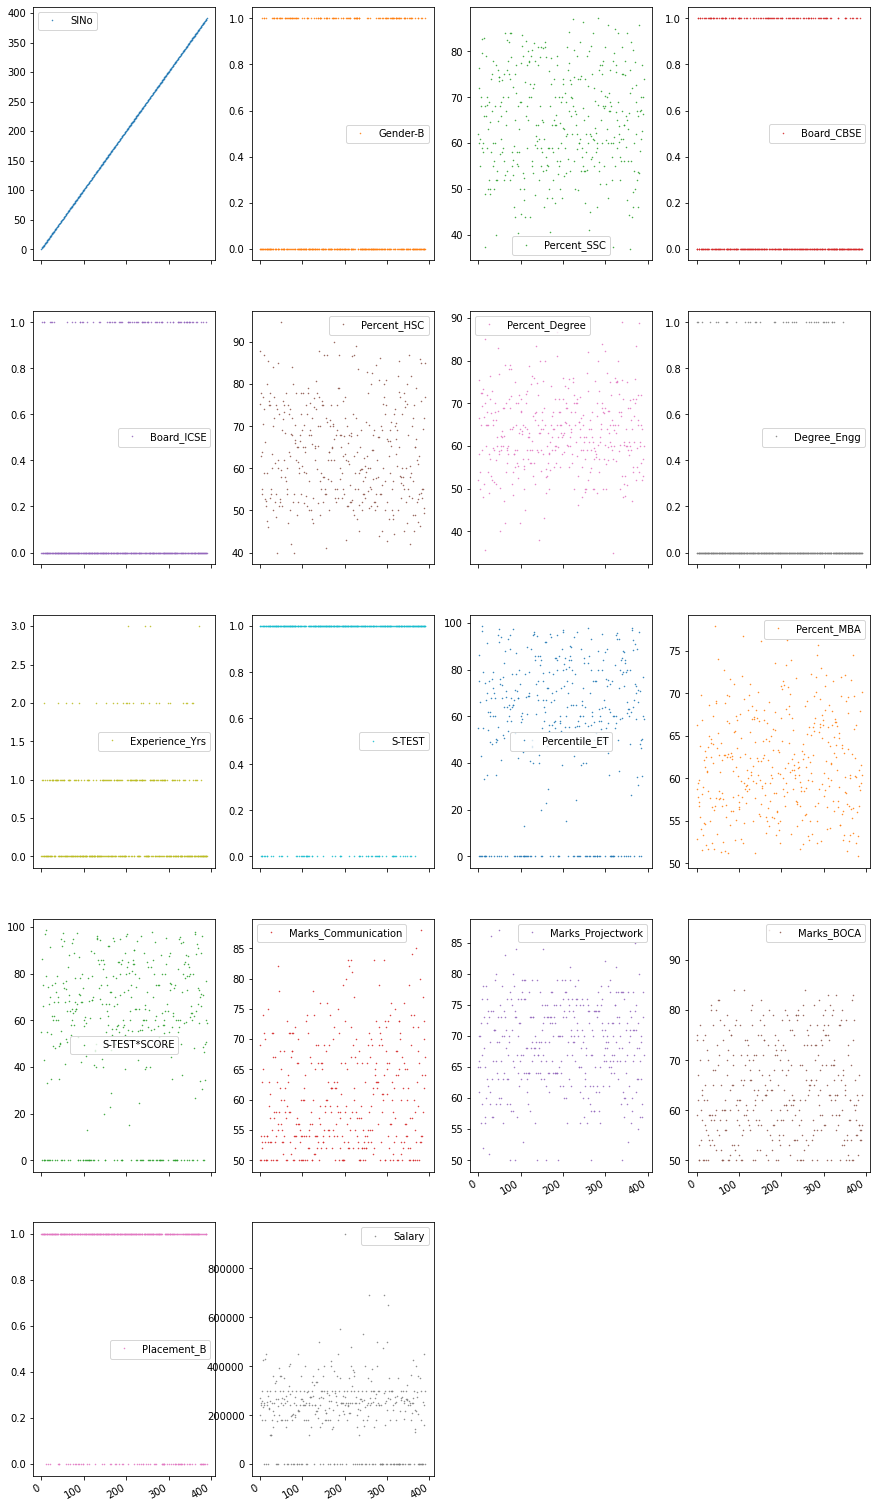

In [13]:
df.plot(lw=0, marker=".", subplots=True, layout=(-1, 4),
          figsize=(15, 30), markersize=1);

Each point in this figure is a sample (i.e. a row) in our dataset and each subplot represents a different feature. The y-axis shows the feature value, while the x-axis is the sample index. These kind of plots can give us a lot of ideas for data cleaning and EDA.

### 2.3.2. Non-numerical features

Given that at this point, we only want to investigate the general quality of the dataset. So what we can do is take a general look at how many unique values each of these non-numerical features contain, and how often their most frequent category is represented.

In [14]:
# Extract descriptive properties of non-numerical features
df.describe(exclude=["number"])

,Gender,Board_SSC,Board_HSC,Stream_HSC,Course_Degree,Entrance_Test,Specialization_MBA,Placement
count,391,391,391,391,391,324,391,391
unique,2,3,3,3,7,8,3,2
top,M,Others,Others,Commerce,Management,MAT,Marketing & Finance,Placed
freq,264,201,247,222,163,265,222,312


There are multiple ways for how you could potentially streamline the quality investigation for each individual features. None of them is perfect, and all of them will require some follow up investigation. But for the purpose of showcasing one such a solution, what we could do is loop through all features and summarise for each of them the number of occurrences per unique value. 

In [17]:
shortform = ['dtype', 'nulls', 'num_uniques', 'value_counts']
tbl_report(df, cols=shortform, card=20)

Table Shape (391, 26)


,dtype,nulls,num_uniques,value_counts
SlNo,int64,0,391,NA
Gender,object,0,2,M:264F:127
Gender-B,int64,0,2,0:2641:127
Percent_SSC,float64,0,154,NA
Board_SSC,object,0,3,Others:201CBSE:113ICSE:77
Board_CBSE,int64,0,2,0:2781:113
Board_ICSE,int64,0,2,0:3141:77
Percent_HSC,float64,0,146,NA
Board_HSC,object,0,3,Others:247CBSE:96ISC:48
Stream_HSC,object,0,3,Commerce:222Science:151Arts:18


## 2.4. Conclusion of quality investigation

At the end of this second investigation, we have a better understanding of the general quality of our dataset. We looked at duplicates, missing values. 

# 3. Content Investigation

Up until now we only looked at the general structure and quality of the dataset. Let's now go a step further and take a look at the actual content. In an ideal setting, such an investigation would be done feature by feature. But this becomes very cumbersome once you have more than 20-30 features.

## 3.1. Feature distribution

Looking at the value distribution of each feature is a great way to better understand the content of your data. Furthermore, it can help to guide your EDA, and provides a lot of useful information with regards to data cleaning and feature transformation. The quickest way to do this for numerical features is using histogram plots. Luckily, `pandas` comes with a builtin histogram function that allows the plotting of multiple features at once.

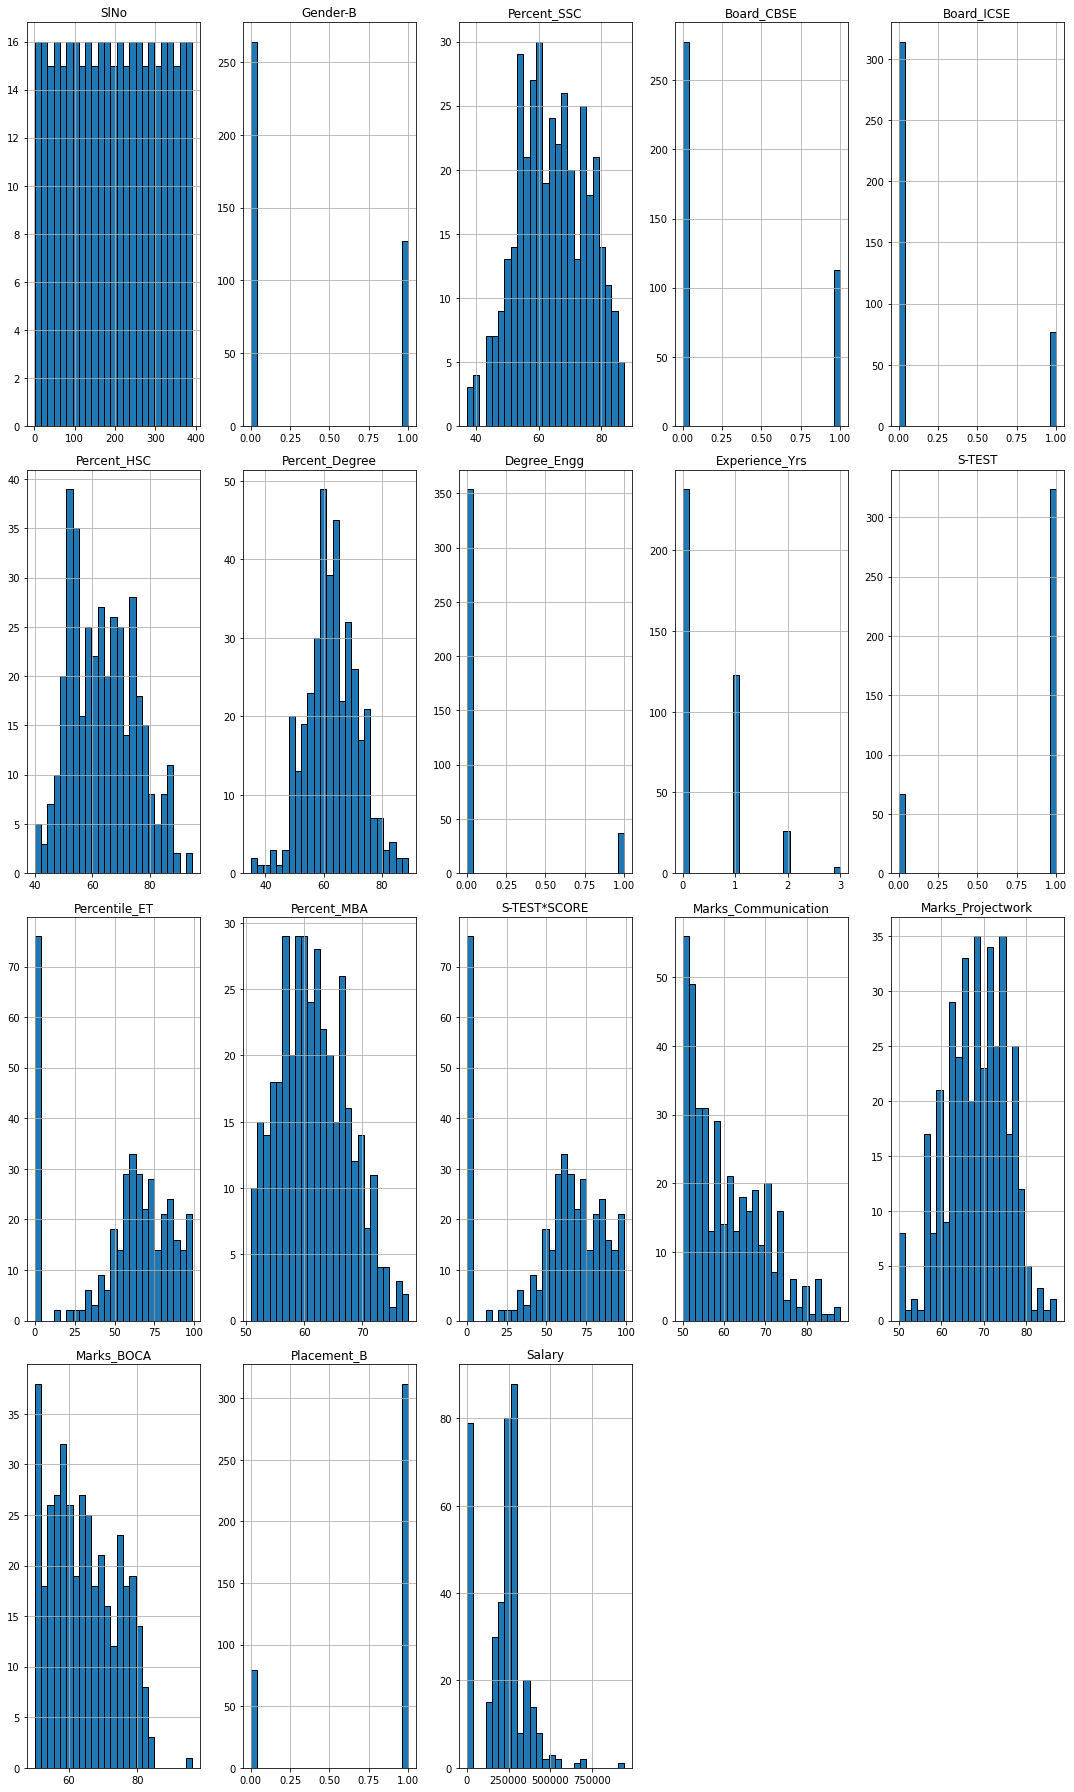

In [18]:
# Plots the histogram for each numerical feature in a separate subplot
df.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

**Skewed value distributions**: Certain kind of numerical features can also show strongly non-gaussian distributions. In that case we might want to think about transformin these values to make them more normal distributed. For example, for right skewed data we could use a log-transformation.

## 3.2. Feature patterns

Next step on the list is the investigation of feature specific patterns. 


In [19]:
# Creates mask to identify numerical features with more or less than 25 unique features
cols_continuous = df.select_dtypes(include="number").nunique() >= 25

### 3.2.1. Continuous features

Now that we have a way to select the continuous features, let's go ahead and use seaborn's `pairplot` to visualize the relationships between these features. 

In [20]:
# Create a new dataframe which only contains the continuous features
df_continuous = df[cols_continuous[cols_continuous].index]
df_continuous.shape

(391, 11)

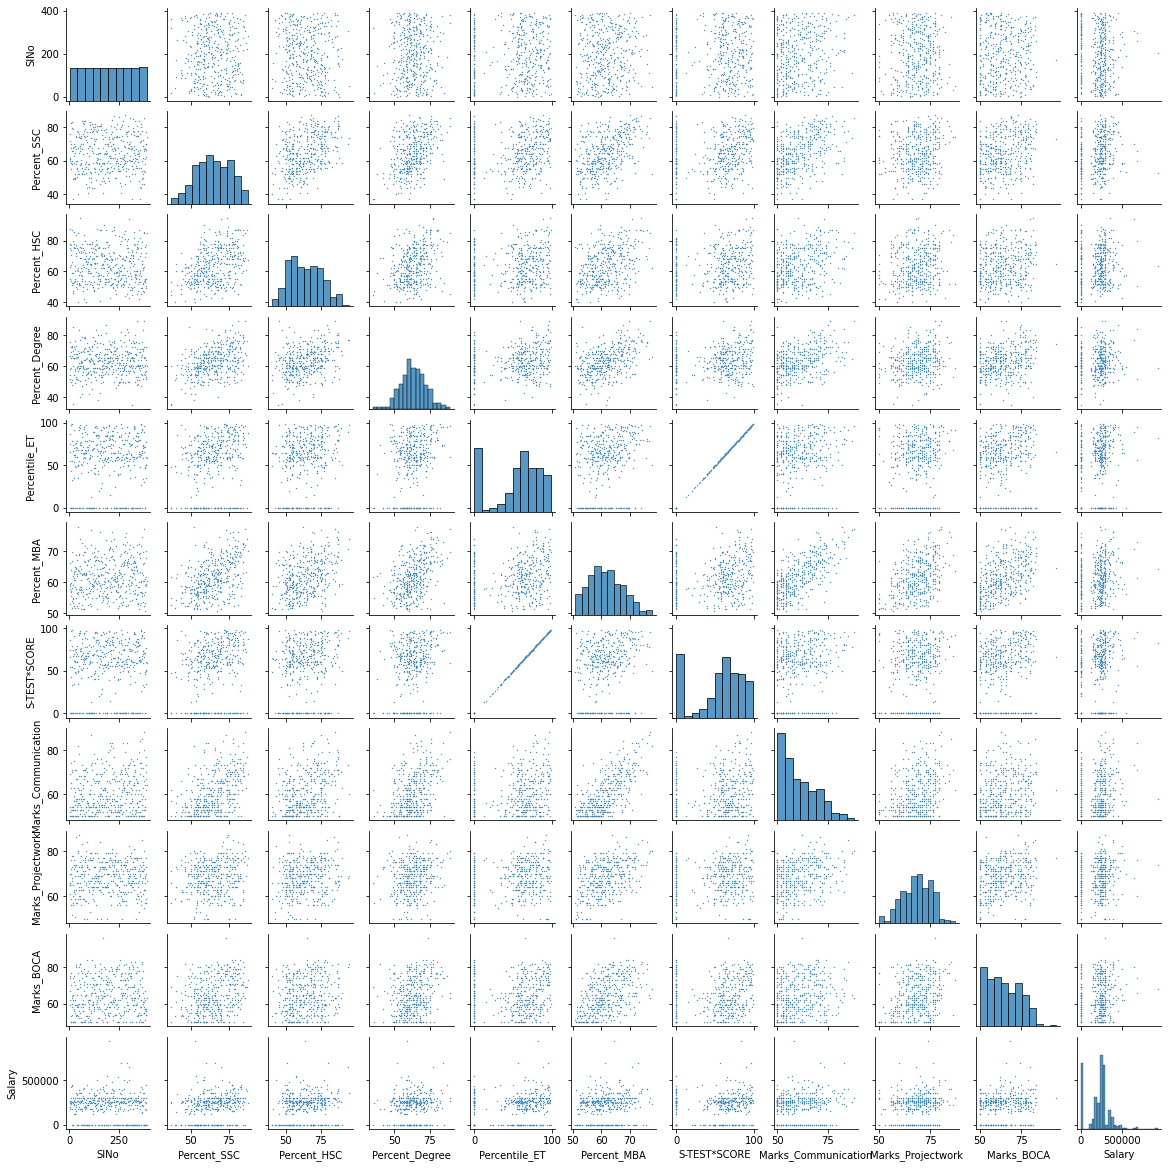

In [21]:
import seaborn as sns

sns.pairplot(df_continuous, height=1.5, plot_kws={"s": 2, "alpha": .8});

There seems to be a linear relationship between a few features in the center. `S-Test_score` and `Percentile_ET`

#### Preparing data for correlation map

So far we have seen that there are  few categorical variables encoded and SlNo which are not really numerical features, so lets have a DataFrame that have propere enocoded categorical features to look at bianry, ordinal and continuous variables

it can be seen from the above summary report we have 67 NaN values in Enterence Test, we can replace the Nan with none

Lets create a copy of the original data and do the above mentioned feature cleaning

In [22]:
df1=df.copy()
df1.drop(['SlNo','Gender','Board_CBSE','Board_ICSE','Degree_Engg','Placement'],axis=1,inplace=True)
categorical_list = list(df1.select_dtypes(include='object'))
df1.replace({np.NAN: 'None'},inplace=True)
df1=pd.get_dummies( df1,columns =categorical_list,drop_first = True )

In [24]:
print(f'number of columns after encoding is {df1.shape[1]} and the unencoded df no. of columns were {df.shape[1]}')

number of columns after encoding is 36 and the unencoded df no. of columns were 26


## 3.3. Feature relationships

Last, but not least, let's take a look at relationships between features. More precisely how they correlate. The quickest way to do so is via pandas' `.corr()` function. So let's go ahead and compute the feature to feature correlation matrix for all numerical features.

In [18]:
# Computes feature correlation
df_corr = df1.corr(method="pearson")

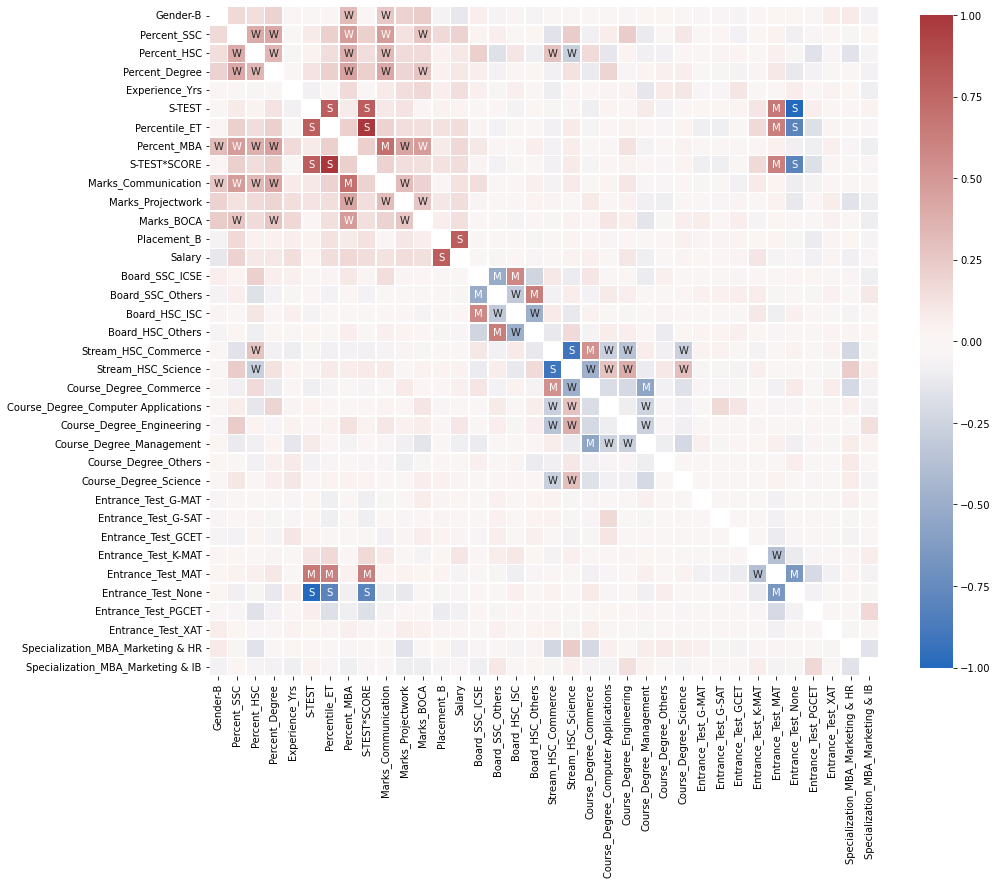

In [22]:
# Create labels for the correlation matrix
import seaborn as sns
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

In [25]:
upper = df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(np.bool))

In [26]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [27]:
to_drop

['S-TEST*SCORE']

This looks already very interesting. We can see a few very strong correlations between some of the features. Now, if we're interested actually ordering all of these different correlations, we could do something like this:

In [79]:
#  Creates a mask to remove the diagonal and the upper triangle.
lower_triangle_mask = np.tril(np.ones(df_corr.shape), k=-1).astype("bool")

#  Stack all correlations, after applying the mask
df_corr_stacked = df_corr.where(lower_triangle_mask).stack().sort_values()

#  Showing the lowest and highest correlations in the correlation matrix
display(df_corr_stacked)

Entrance_Test_None        S-TEST                   -1.000000
Stream_HSC_Science        Stream_HSC_Commerce      -0.909109
Entrance_Test_None        Percentile_ET            -0.802522
                          Entrance_Test_MAT        -0.659481
Course_Degree_Management  Course_Degree_Commerce   -0.552515
                                                      ...   
Entrance_Test_MAT         Percentile_ET             0.626382
Board_HSC_Others          Board_SSC_Others          0.636808
Entrance_Test_MAT         S-TEST                    0.659481
Marks_Communication       Percent_MBA               0.706999
Percentile_ET             S-TEST                    0.802522
Length: 561, dtype: float64

As you can see, the investigation of feature correlations can be very informative. But looking at everything at once can sometimes be more confusing than helpful. So focusing only on one feature with something like `df.corrwith(df["Percent_MBA"])` might be a better approach.

In [9]:
mask=(df['Placement']=='Not Placed')&(df['Experience_Yrs']>0)
df[mask]['Salary'].value_counts()

0    25
Name: Salary, dtype: int64

In [10]:
mask=(df['Placement']=='Placed')&(df['Salary']==0)
df[mask]['Salary'].value_counts()

Series([], Name: Salary, dtype: int64)

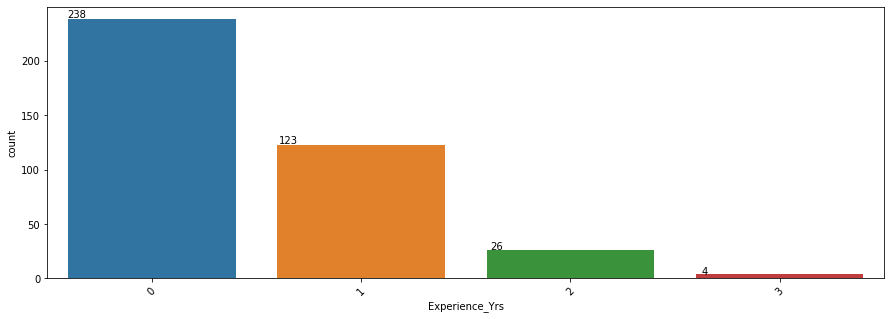

In [78]:
plt.figure(figsize = (15,5))
ax= sns.countplot(df['Experience_Yrs'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 45)
plt.show()

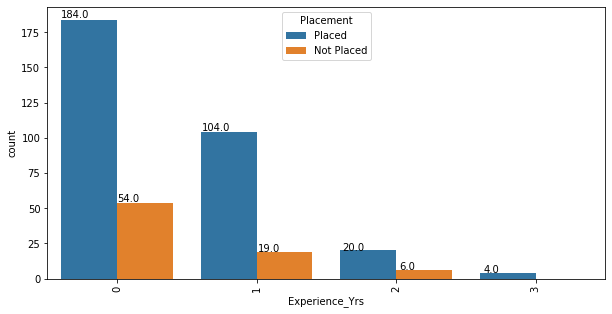

In [76]:
plt.figure(figsize = (10,5))
ax= sns.countplot(x = "Experience_Yrs", hue = "Placement", data = df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation = 90)
plt.show()

From the Salary column investigation we can observe that these are not the prior earned salary  

#### 3.4. Conclusion of content investigation

At the end of this third investigation, we have a better understanding of the content in our dataset. We looked at value distribution, feature patterns and feature correlations. However, these are certainly not all possible content investigation and data cleaning steps we could do. Additional steps would for example be outlier detection and removal, feature engineering and transformation, and more.


<hr style="border-top: 100000px black; margin-top: 30000px; margin-bottom: 30000px"></hr>


## CHIAD

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
from chefboost import Chefboost as chef
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from dtreeviz.trees import *
import seaborn as sns

<div class="alert alert-block alert-danger" >
From the above EDA we can now start preparing data as required by different models

Preparing data: CHIAD requires categorical variables as categorical data. We will keep the categorical columns as is remove the redundant variable such as 'Gender-B', where we have the categorical feature 'Gender', 'Board_CBSE' and 'Board_ICSE' , whose categorical feature is 'Board_SSC', 'Degree_Engg', which is an encoding for Engineering category in 'Course_Degree' categorical feature, 'Placement_B' an another 0,1 encoding for Not Placed and Placed for which the categorical feature is 'Placement',S-TEST_Score is same as Percentile_EP, we should drop one of these and lastly we do not need the 'Salary' feature as we are interested in Admissions of students. The Salary and MBA features are post admissions data that would be colected. **Considering the Salary ( from EDA it is observed that salary is a function of Placement)** showing that there were no salary no placement and **MBA related featuers** is **not appropriate** for the Deans Dilemma for admissions,as the dean would like to consider the candidates and the MBA realated marks variables are post admissions, these varibles will not be available during the admissions process.

**Pre Processing**

In [5]:
features_ls=list(df.iloc[:,2:-9].columns)+['Placement']
features_ls=list(set(features_ls)-set(['Gender-B','Board_CBSE','Board_ICSE','Degree_Engg']))

In [6]:
#Initial Cleanup
chaid_df=df[features_ls]
chaid_df.replace({np.NAN: 'None'},inplace=True)

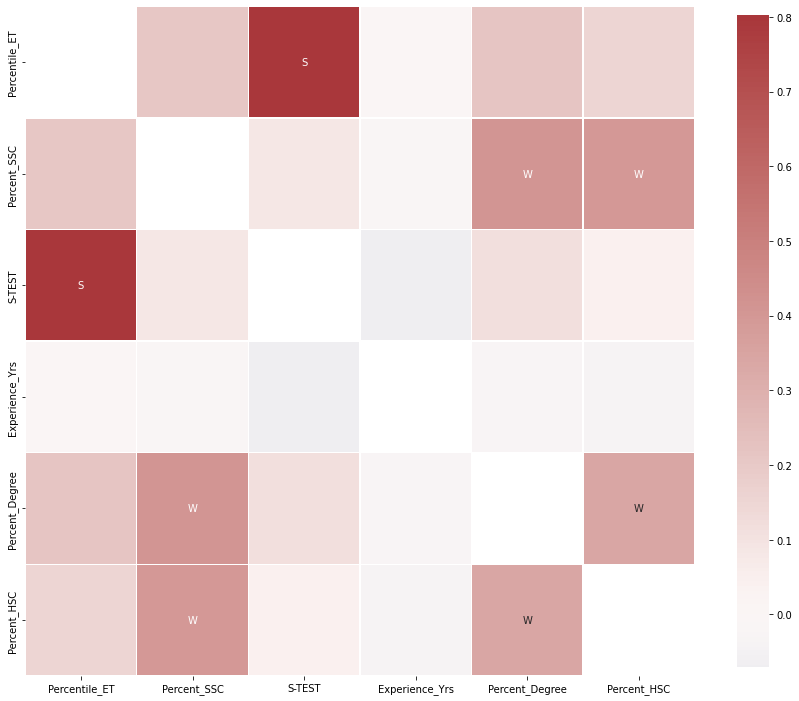

In [42]:
df_corr=chaid_df.corr()
# Create labels for the correlation matrix
import seaborn as sns
labels = np.where(np.abs(df_corr)>0.8, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

We can drop S-TEST as we can see it is Highly correlated with Perecntile_ET (Greater than 0.8), From the date we can see anyone taking the Entrance Test they have 1 as the S-Test encoding. We can keep the Percentile_ET as this provides more information that 1,0 S-Test feature.

In [43]:
#Dropping high correlated variables
chaid_df.drop('S-TEST',axis=1,inplace=True)

In [44]:
# Rename Target variable to Decision for ChefBoost CHAID algorithm
X=chaid_df.copy()
X = X.rename(columns={"Placement": "Decision"})

In [45]:
# Test and train data split to validate the model
X_train, X_test = train_test_split(X, test_size=0.2, random_state=63, stratify=X["Decision"])

In [46]:
config = {'algorithm': 'CHAID','enableParallelism': True}
model = chef.fit(X_train, config = config,target_label='Decision')

[INFO]:  1 CPU cores will be allocated in parallel running
CHAID  tree is going to be built...
-------------------------
finished in  27.316141605377197  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  96.7948717948718 % on  312  instances
Labels:  ['Placed' 'Not Placed']
Confusion matrix:  [[246, 7], [3, 56]]
Precision:  97.2332 %, Recall:  98.7952 %, F1:  98.008 %


In [47]:
evaluation = chef.evaluate(model, X_test, task="test")

['Board_HSC', 'Percentile_ET', 'Entrance_Test', 'Percent_SSC', 'Board_SSC', 'Stream_HSC', 'Experience_Yrs', 'Course_Degree', 'Percent_Degree', 'Percent_HSC', 'Decision']
-------------------------
Evaluate  test set
-------------------------
Accuracy:  72.15189873417721 % on  79  instances
Labels:  ['Placed' 'Not Placed']
Confusion matrix:  [[53, 12], [10, 4]]
Precision:  81.5385 %, Recall:  84.127 %, F1:  82.8125 %


Decision rule:  outputs/rules/rules.py


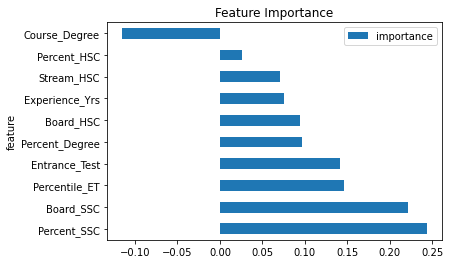

In [48]:
rules = "outputs/rules/rules.py"
fi = chef.feature_importance(rules).set_index("feature")
fi.plot(kind="barh", title="Feature Importance");

<div class="alert alert-block alert-danger" >
    From the CHIAD the top 5 variables that can predict if a candidate will get placed is by looking the Percent_SSC, Board_SSC, Percentile_ET, Entrance_Test and Percent_Degree
    
    The Test accuracy is just 72.1% on 79 records

## CART

In [10]:
#converting categoricals to numerical
df1=df[features_ls].copy()
categorical_list = list(df1.select_dtypes(include='object'))
df1.replace({np.NAN: 'None'},inplace=True)
df1=pd.get_dummies( df1,columns =categorical_list,drop_first = True )

Often, we are interested in understanding association between variables which may be related through a non-linear function. In these cases, even when variables have a strong association, Pearson’s correlation would be low. To properly identify association between variables with non-linear relationships, we can use rank-based correlation approaches. Below there are four examples of ordinal or rank correlation approaches:

- Spearman Correlation
- Goodman Kruskal’s Gamma
- Kendall’s Tau
- Somers’ D

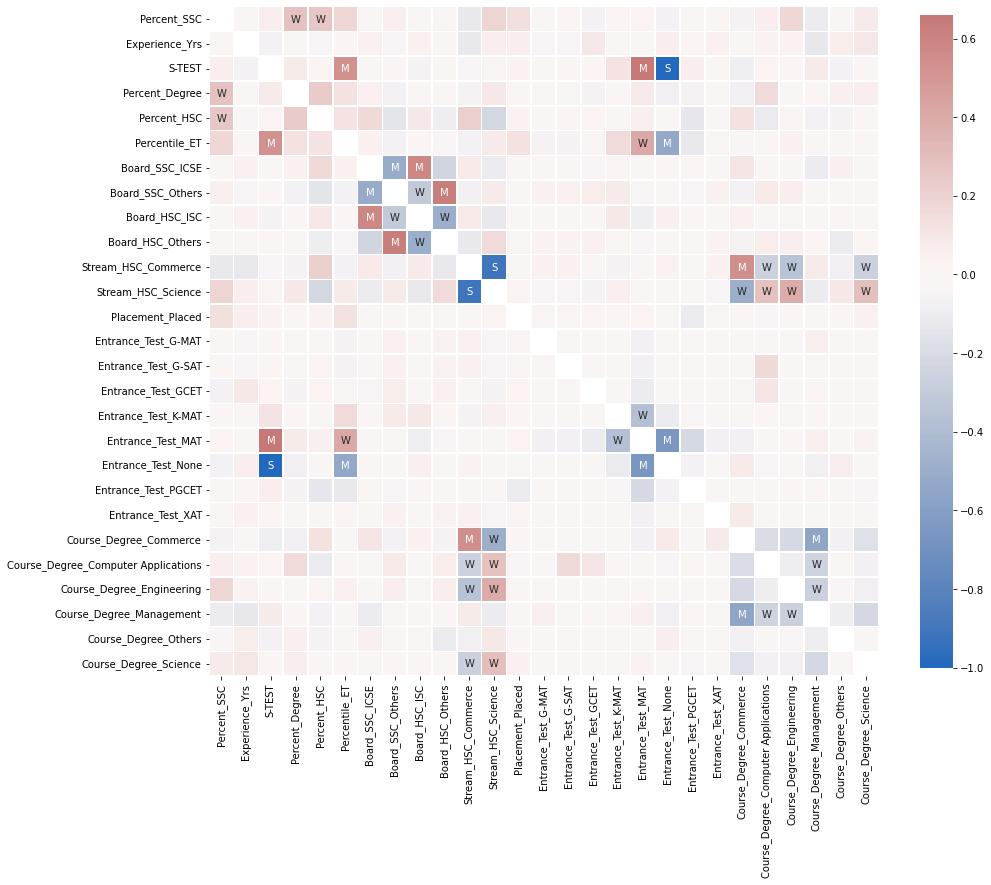

In [11]:
df_corr=df1.corr(method='kendall')
# Create labels for the correlation matrix
import seaborn as sns
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

In [12]:
upper = df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.8)]

In [13]:
to_drop=to_drop+['S-TEST']
to_drop

['Stream_HSC_Science', 'Entrance_Test_None', 'S-TEST']

In [14]:
df1.drop(to_drop,axis=1,inplace=True)

### CART for all vaiables

In [58]:
X=df1.drop('Placement_Placed',axis=1)
y=df1['Placement_Placed']

In [59]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=63, stratify=y)


In [60]:

# Initialize a Decision Tree classifier with a depth of 1
dt1 = DecisionTreeClassifier(max_depth=1)


# Initialize a Decision Tree classifier with a depth of 3
dt2 = DecisionTreeClassifier(max_depth=3)


# Initialize a Decision Tree classifier with a depth of 5
dt3 = DecisionTreeClassifier(max_depth=5)


# Fit all the classifier on the train data
dt1.fit(X_train,y_train)
dt2.fit(X_train,y_train)
dt3.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=5)

In [61]:
### edTest(test_accuracy) ###

# Compute the train and test accuracy for the first decision tree classifier of depth 2
dt1_train_acc = dt1.score(X_train, y_train)
dt1_test_acc = dt1.score(X_test, y_test)

# Compute the train and test accuracy for the second decision tree classifier of depth 10
dt2_train_acc = dt2.score(X_train, y_train)
dt2_test_acc = dt2.score(X_test, y_test)

# Compute the train and test accuracy for the third decision tree classifier of depth 15
dt3_train_acc = dt3.score(X_train, y_train)
dt3_test_acc = dt3.score(X_test, y_test)


In [62]:
from prettytable import PrettyTable
# Helper code to plot the scores of each classifier as a table
pt = PrettyTable()
pt.field_names = ['Max Depth',  'Train Accuracy', 'Test Accuracy']
pt.add_row([1,  round(dt1_train_acc, 4), round(dt1_test_acc,4)])
pt.add_row([3,  round(dt2_train_acc,4), round(dt2_test_acc,4)])
pt.add_row([5,  round(dt3_train_acc,4), round(dt3_test_acc,4)])
print(pt)


+-----------+----------------+---------------+
| Max Depth | Train Accuracy | Test Accuracy |
+-----------+----------------+---------------+
|     1     |     0.8168     |     0.7966    |
|     3     |     0.8278     |     0.7966    |
|     5     |     0.8498     |     0.8051    |
+-----------+----------------+---------------+


In [63]:
# Hyper_parameter tuning
param_dict={'criterion':['gini','entropy'],
            'max_depth':range(1,10),
            'min_samples_split':range(1,10),
            'min_samples_leaf':range(1,10)
           }

In [64]:
dt=DecisionTreeClassifier()
grid=GridSearchCV(dt,
                  param_grid=param_dict,
                  cv=3,
                  verbose=1,
                  scoring='accuracy')
grid.fit(X_train,y_train)

Fitting 3 folds for each of 1458 candidates, totalling 4374 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10)},
             scoring='accuracy', verbose=1)

In [65]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [66]:
grid.best_score_

0.8058608058608058

In [67]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=1)

In [68]:
dt_best=grid.best_estimator_

In [69]:
evaluate_model(dt_best)

Train Accuracy : 0.8168498168498168
Train Confusion Matrix:
[[  9  46]
 [  4 214]]
--------------------------------------------------
Test Accuracy : 0.7966101694915254
Test Confusion Matrix:
[[ 1 23]
 [ 1 93]]


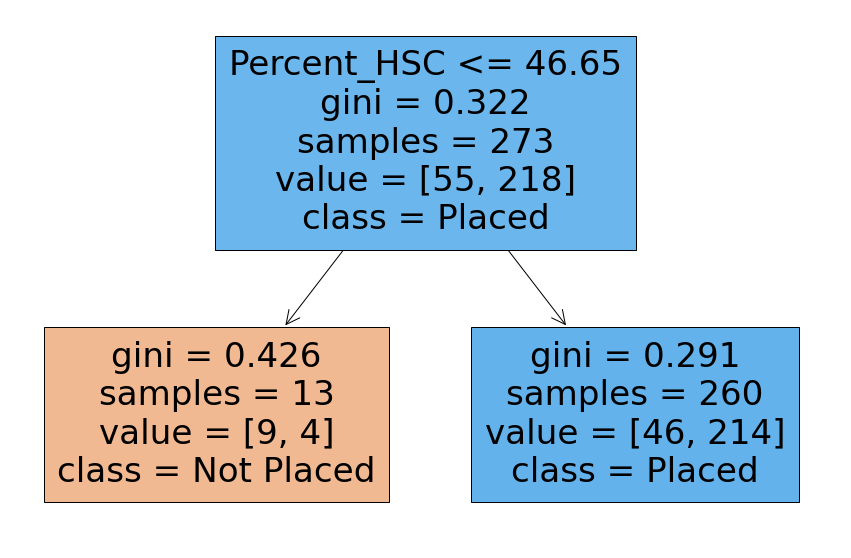

In [70]:
get_dt_graph(dt_best)

In [71]:
from dtreeviz.trees import *


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


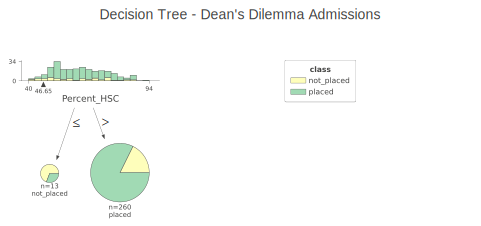

In [72]:
viz = dtreeviz(dt_best, 
               x_data=X_train,
               y_data=y_train,
               target_name='class',
               feature_names=X_train.columns, 
               class_names=['not_placed','placed'],
               title="Decision Tree - Dean's Dilemma Admissions",)
               #orientation="LR", 
               #X=X_test[0])  
viz

From the hyper-parameter tuned CART test accuracy of 79% is achieved, which is reaching better accuracy than CHAID model.

<div class="alert alert-block alert-danger" >
    
## **Business Rules **
From *CHIAD* and *CART* tree terminal nodes we can come up with business Rules such as:
    
| Node| Business Rule| Support |
| :- | -: | :-: |
| 1 | If Percentage in HSC ≤ 46.65 classify the outcome as y=0. Classification accuracy is 69.23% | 4%
| 2 | If Percentage in HSC > 46.65 classify the outcome as y=1. Classification accuracy is 82.3% | 96%
   
    
For Practical application, we may look for the business rules that have high accuracy aswell as high support. For example, the accuracy at node 2 is 82% and 96% of data ( 260 out of 273 observations) fall under this rule. Thus the business rule corresponding to node 2,i.e, if Percent HSC > 46.65 classification is 1. On the other hand, rule corresponding to  node 1 has a low accuracy and not preferred.
    
</div>

**The below business rules is derived constraining the hyper-parameter tuning to start with max depth of 2 and train test split of 80-20** This is done to look at the next important variable and its business rules and support

<div class="alert alert-block alert-danger" >
    
## **Business Rules **
From *CHIAD* and *CART* tree terminal nodes we can come up with business Rules such as:
    
| Node| Business Rule| Support |
| :- | -: | :-: |
| 3 | If Percentage in HSC ≤ 46.65 classify the outcome as y=0. Classification accuracy is 75% | 3.84%
| 4 | If Percentage in HSC ≤ 46.65 and Percentage in SSC > 68.12, classify the outcome as y=1. Classification accuracy is 25% | 0.641%
| 5 | If Percentage in HSC > 46.65 and Percentage in Degree ≤ 46.61, classify the outcome as y=0. Classification accuracy is 2% | 1.92%
| 6 | If Percentage in HSC > 46.65 and Percentage in Degree > 46.61, classify the outcome as y=1. Classification accuracy is 98% | 93.58%    
    


For Practical application, we may look for the business rules that have high accuracy aswell as high support. For example, the accuracy at node 6 is 98% and 93.5% of data ( 292 out of 312 observations) fall under this rule. Thus the business rule corresponding to node 6,i.e, if Percent HSC > 46.65 and Percent_Degree is > 46.61 then the placement classification is 1. On the other hand, rule corresponding to  node 3,4 \& 5 has a low accuracy.
    
</div>



## Develop classification models using CART, CHAID, logistic regression, discriminant analysis and SVM.  Check whether an ensemble method gives better accuracy compared to the individual approaches?

In [1]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report

In [2]:
def fitting(x_train,x_test,y_train,y_test,clf):
    #print(clf.__class__)
    clf.fit(x_train,y_train)
    y_pred_train=clf.predict(x_train)
    y_pred_test=clf.predict(x_test)
    acc_test=accuracy_score(y_pred_test,y_test)
    acc_train=accuracy_score(y_pred_train,y_train)
    #print(f'Accuracy for {clf} is {np.round(acc,3)}')
    return np.round(acc_train,9),np.round(acc_test,9)

In [61]:
dt_clf=dt_best
lr_clf=LogisticRegression(random_state=41,C=1, solver='liblinear')
#svm_clf=SVC(random_state=42)
svc_clf = SVC(C=1, kernel='linear', gamma='auto')
lda_clf=LinearDiscriminantAnalysis()

In [62]:
_ = {}
for clf in [dt_clf,lr_clf,svc_clf,lda_clf]:
    _[clf] = fitting(X_train,X_test,y_train,y_test,clf)

In [63]:
_

{DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=4): (0.846153846,
  0.810126582),
 LogisticRegression(C=1, random_state=41, solver='liblinear'): (0.804487179,
  0.797468354),
 SVC(C=1, gamma='auto', kernel='linear'): (0.804487179, 0.797468354),
 LinearDiscriminantAnalysis(): (0.804487179, 0.784810127)}

In [64]:
from prettytable import PrettyTable
# Helper code to plot the scores of each classifier as a table
pt = PrettyTable()
pt.field_names = ['Random hyper-parameter Classifiers','Train Accuracy', 'Test Accuracy']
pt.add_row([list(_.keys())[0],  round(_[dt_clf][0], 4), round(_[dt_clf][1],4)])
pt.add_row([list(_.keys())[1],  round(_[lr_clf][0],4), round(_[lr_clf][1],4)])
pt.add_row([list(_.keys())[2],  round(_[svc_clf][0],4), round(_[svc_clf][1],4)])
pt.add_row([list(_.keys())[3],  round(_[lda_clf][0],4), round(_[lda_clf][1],4)])
print(pt)


+-------------------------------------------------------------------------------+----------------+---------------+
|                       Random hyper-parameter Classifiers                      | Train Accuracy | Test Accuracy |
+-------------------------------------------------------------------------------+----------------+---------------+
| DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=4) |     0.8462     |     0.8101    |
|          LogisticRegression(C=1, random_state=41, solver='liblinear')         |     0.8045     |     0.7975    |
|                    SVC(C=1, gamma='auto', kernel='linear')                    |     0.8045     |     0.7975    |
|                          LinearDiscriminantAnalysis()                         |     0.8045     |     0.7848    |
+-------------------------------------------------------------------------------+----------------+---------------+


In [65]:
# Hyper-parameter tuning Decision Tree Classifier

In [34]:
# random search logistic regression model on the sonar dataset
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

model = LogisticRegression()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)
# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', cv=cv, random_state=1)
# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.7981854838709673
Best Hyperparameters: {'C': 0.00026987692189069833, 'penalty': 'l2', 'solver': 'newton-cg'}


In [65]:
# Hyper-parameter tuning Decision Tree Classifier

In [36]:
lr_best=result.best_estimator_

In [37]:

# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = RandomizedSearchCV(SVC(), param_grid, refit = True,cv=cv ,verbose = 3)
 
# fitting the model for grid search
result=grid.fit(X_train, y_train)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Fitting 30 folds for each of 10 candidates, totalling 300 fits
[CV 1/30] END ....C=1, gamma=0.0001, kernel=rbf;, score=0.781 total time=   0.0s
[CV 2/30] END ....C=1, gamma=0.0001, kernel=rbf;, score=0.781 total time=   0.0s
[CV 3/30] END ....C=1, gamma=0.0001, kernel=rbf;, score=0.806 total time=   0.0s
[CV 4/30] END ....C=1, gamma=0.0001, kernel=rbf;, score=0.806 total time=   0.0s
[CV 5/30] END ....C=1, gamma=0.0001, kernel=rbf;, score=0.806 total time=   0.0s
[CV 6/30] END ....C=1, gamma=0.0001, kernel=rbf;, score=0.806 total time=   0.0s
[CV 7/30] END ....C=1, gamma=0.0001, kernel=rbf;, score=0.806 total time=   0.0s
[CV 8/30] END ....C=1, gamma=0.0001, kernel=rbf;, score=0.806 total time=   0.0s
[CV 9/30] END ....C=1, gamma=0.0001, kernel=rbf;, score=0.806 total time=   0.0s
[CV 10/30] END ...C=1, gamma=0.0001, kernel=rbf;, score=0.774 total time=   0.0s
[CV 11/30] END ...C=1, gamma=0.0001, kernel=rbf;, score=0.781 total time=   0.0s
[CV 12/30] END ...C=1, gamma=0.0001, kernel=rb

[CV 20/30] END ...C=0.1, gamma=0.01, kernel=rbf;, score=0.774 total time=   0.0s
[CV 21/30] END ...C=0.1, gamma=0.01, kernel=rbf;, score=0.781 total time=   0.0s
[CV 22/30] END ...C=0.1, gamma=0.01, kernel=rbf;, score=0.781 total time=   0.0s
[CV 23/30] END ...C=0.1, gamma=0.01, kernel=rbf;, score=0.806 total time=   0.0s
[CV 24/30] END ...C=0.1, gamma=0.01, kernel=rbf;, score=0.806 total time=   0.0s
[CV 25/30] END ...C=0.1, gamma=0.01, kernel=rbf;, score=0.806 total time=   0.0s
[CV 26/30] END ...C=0.1, gamma=0.01, kernel=rbf;, score=0.806 total time=   0.0s
[CV 27/30] END ...C=0.1, gamma=0.01, kernel=rbf;, score=0.806 total time=   0.0s
[CV 28/30] END ...C=0.1, gamma=0.01, kernel=rbf;, score=0.806 total time=   0.0s
[CV 29/30] END ...C=0.1, gamma=0.01, kernel=rbf;, score=0.806 total time=   0.0s
[CV 30/30] END ...C=0.1, gamma=0.01, kernel=rbf;, score=0.774 total time=   0.0s
[CV 1/30] END ..C=0.1, gamma=0.0001, kernel=rbf;, score=0.781 total time=   0.0s
[CV 2/30] END ..C=0.1, gamma

[CV 14/30] END ...C=10, gamma=0.001, kernel=rbf;, score=0.806 total time=   0.0s
[CV 15/30] END ...C=10, gamma=0.001, kernel=rbf;, score=0.742 total time=   0.0s
[CV 16/30] END ...C=10, gamma=0.001, kernel=rbf;, score=0.806 total time=   0.0s
[CV 17/30] END ...C=10, gamma=0.001, kernel=rbf;, score=0.806 total time=   0.0s
[CV 18/30] END ...C=10, gamma=0.001, kernel=rbf;, score=0.806 total time=   0.0s
[CV 19/30] END ...C=10, gamma=0.001, kernel=rbf;, score=0.742 total time=   0.0s
[CV 20/30] END ...C=10, gamma=0.001, kernel=rbf;, score=0.742 total time=   0.0s
[CV 21/30] END ...C=10, gamma=0.001, kernel=rbf;, score=0.781 total time=   0.0s
[CV 22/30] END ...C=10, gamma=0.001, kernel=rbf;, score=0.781 total time=   0.0s
[CV 23/30] END ...C=10, gamma=0.001, kernel=rbf;, score=0.806 total time=   0.0s
[CV 24/30] END ...C=10, gamma=0.001, kernel=rbf;, score=0.774 total time=   0.0s
[CV 25/30] END ...C=10, gamma=0.001, kernel=rbf;, score=0.806 total time=   0.0s
[CV 26/30] END ...C=10, gamm

In [39]:
svc_best=result.best_estimator_

In [41]:
model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('Mean Accuracy: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

Mean Accuracy: 0.785
Config: {'solver': 'svd'}


In [42]:
lda_best=results.best_estimator_

In [45]:
_ = {}
for clf in [dt_best,lr_best,svc_best,lda_best]:
    _[clf] = fitting(X_train,X_test,y_train,y_test,clf)

In [47]:
from prettytable import PrettyTable
# Helper code to plot the scores of each classifier as a table
pt = PrettyTable()
pt.field_names = ['Random hyper-parameter Classifiers','Train Accuracy', 'Test Accuracy']
pt.add_row([list(_.keys())[0],  round(_[dt_best][0], 4), round(_[dt_best][1],4)])
pt.add_row([list(_.keys())[1],  round(_[lr_best][0],4), round(_[lr_best][1],4)])
pt.add_row([list(_.keys())[2],  round(_[svc_best][0],4), round(_[svc_best][1],4)])
pt.add_row([list(_.keys())[3],  round(_[lda_best][0],4), round(_[lda_best][1],4)])
print(pt)


+------------------------------------------------------------------+----------------+---------------+
|                Random hyper-parameter Classifiers                | Train Accuracy | Test Accuracy |
+------------------------------------------------------------------+----------------+---------------+
|               DecisionTreeClassifier(max_depth=2)                |     0.8237     |     0.7975    |
| LogisticRegression(C=0.00026987692189069833, solver='newton-cg') |     0.7981     |     0.7975    |
|                      SVC(C=1, gamma=0.0001)                      |     0.7981     |     0.7975    |
|                   LinearDiscriminantAnalysis()                   |     0.8013     |     0.7848    |
+------------------------------------------------------------------+----------------+---------------+


In [48]:
# ensemble method
from sklearn import ensemble
from sklearn.model_selection import cross_validate

We will evaluate model configurations using repeated stratified k-fold cross-validation with three repeats and 10 folds.

In [49]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [50]:
from sklearn.ensemble import VotingClassifier
voting_clf_hard = VotingClassifier(estimators=[('lr', lr_best), 
                                               ('svc', svc_best), 
                                               ('dt', dt_best),
                                               ('lda',lda_best)],
                                   voting='hard')

In [51]:
voting_clf_hard.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.00026987692189069833,
                                                 solver='newton-cg')),
                             ('svc', SVC(C=1, gamma=0.0001)),
                             ('dt', DecisionTreeClassifier(max_depth=2)),
                             ('lda', LinearDiscriminantAnalysis())])

In [52]:
y_pred = voting_clf_hard.predict(X_test)

In [53]:
accuracy_score(y_test, y_pred)

0.7974683544303798

In [54]:
for clf_hard in (lr_best, svc_best, dt_best,lda_best ,voting_clf_hard):
    
    clf_hard.fit(X_train, y_train)
    y_pred = clf_hard.predict(X_test)
    
    print(clf_hard.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.7974683544303798
SVC 0.7974683544303798
DecisionTreeClassifier 0.7974683544303798
LinearDiscriminantAnalysis 0.7848101265822784
VotingClassifier 0.7974683544303798


In [55]:
svc_clf_soft = SVC(C=1, kernel='linear', gamma='auto', probability=True)

In [56]:
voting_clf_soft = VotingClassifier(estimators=[('lr', lr_best), 
                                               ('svc', svc_clf_soft), 
                                               ('dt', dt_best),
                                               ('lda',lda_best)],
                                   voting='soft', 
                                   weights = [0.40, 0.30, 0.30,0.3])

In [59]:
for clf_soft in (lr_best, svc_best, dt_best,lda_best, voting_clf_soft):
    
    clf_soft.fit(X_train, y_train)
    y_pred = clf_soft.predict(X_test)
    
    print(clf_soft.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.7974683544303798
SVC 0.7974683544303798
DecisionTreeClassifier 0.7974683544303798
LinearDiscriminantAnalysis 0.7848101265822784
VotingClassifier 0.7974683544303798


<div class="alert alert-block alert-danger" >
    The ensemble method is performing similar to individual models like Logistics Regression, SVC or CART, we are getting similar accuracy of 79.74% in soft voting and hard voting ensemble voting classifier. 



##  Use random forest for classification; compare the accuracy with CART tree.!

In [60]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

In [61]:
from collections import OrderedDict
clf = RandomForestClassifier(warm_start=True, 
                               oob_score=True,
                               min_samples_leaf=2,
                               max_depth = 10,
                               random_state=45)

error_rate = {}

# Range of `n_estimators` values to explore.
min_estimators = 150
max_estimators = 500


for i in range(min_estimators, max_estimators + 1):
    clf.set_params(n_estimators=i) 
    clf.fit(X_train, y_train)

    # Record the OOB error for each `n_estimators=i` setting.
    oob_error = 1 - clf.oob_score_
    error_rate[i] = oob_error

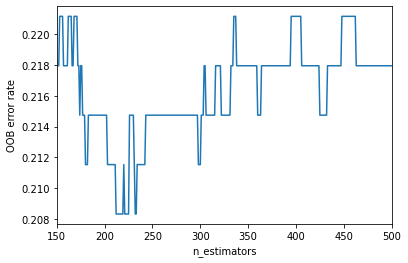

CPU times: user 141 ms, sys: 4.11 ms, total: 145 ms
Wall time: 141 ms


In [62]:
%%time
# Generate the "OOB error rate" vs. "n_estimators" plot.
# OOB error rate = num_missclassified/total observations (%)\
xs = []
ys = []
for label, clf_err in error_rate.items():
    xs.append(label)
    ys.append(clf_err)   
plt.plot(xs, ys)
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.show()

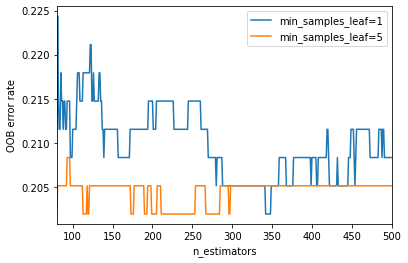

CPU times: user 1min 17s, sys: 643 ms, total: 1min 17s
Wall time: 1min 17s


In [64]:
%%time
from collections import OrderedDict
seed=42
ensemble_clfs = [
    (1,
        RandomForestClassifier(warm_start=True, 
                               min_samples_leaf=1,
                               oob_score=True,
                               max_depth = 10,
                               random_state=seed)),
    (5,
        RandomForestClassifier(warm_start=True, 
                               min_samples_leaf=5,
                               oob_score=True,
                               max_depth = 10,
                               random_state=seed))
]

# Map a label (the value of `min_samples_leaf`) to a list of (model, oob error) tuples.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

min_estimators = 80
max_estimators = 500

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i) 
        clf.fit(X_train, y_train)

        # Record the OOB error for each model. Error is 1 - oob_score
        # oob_score: score of the training dataset obtained using an 
        # out-of-bag estimate.
        # OOB error rate is % of num_missclassified/total observations
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=f'min_samples_leaf={label}')

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [65]:
err = 100
best_num_estimators = 0
for label, clf_err in error_rate.items():
    num_estimators, error = min(clf_err, key=lambda n: (n[1], -n[0]))
    if error<err: err=error; best_num_estimators = num_estimators; best_leaf = label

print(f'Optimum num of estimators: {best_num_estimators} \nmin_samples_leaf: {best_leaf}')

Optimum num of estimators: 348 
min_samples_leaf: 1


In [68]:
do_grid_search = True

if do_grid_search:
    rf = RandomForestClassifier(
                               n_estimators= best_num_estimators,
                               oob_score=True,
                               max_features = 'sqrt',
                               min_samples_leaf=best_leaf,
                               random_state=seed).fit(X_train,y_train)

    param_grid = {
        'min_samples_split': [2,5,None]}
    
    scoring = 'accuracy'
    
    grid_search = GridSearchCV(rf, 
                               param_grid, 
                               scoring=scoring, 
                               refit='AUC', 
                               return_train_score=True, 
                               )
    
    results = grid_search.fit(X_train, y_train)
    print(results.best_estimator_.get_params())
    best_rf = results.best_estimator_
    # Calculate AUC/ROC
    y_proba = best_rf.predict(X_test)
    auc = np.round(accuracy_score(y_test, y_proba),2)
    print(f'\nGridSearchCV RF accuracy on test set:{auc}')

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 348, 'n_jobs': None, 'oob_score': True, 'random_state': 42, 'verbose': 0, 'warm_start': False}

GridSearchCV RF accuracy on test set:0.8


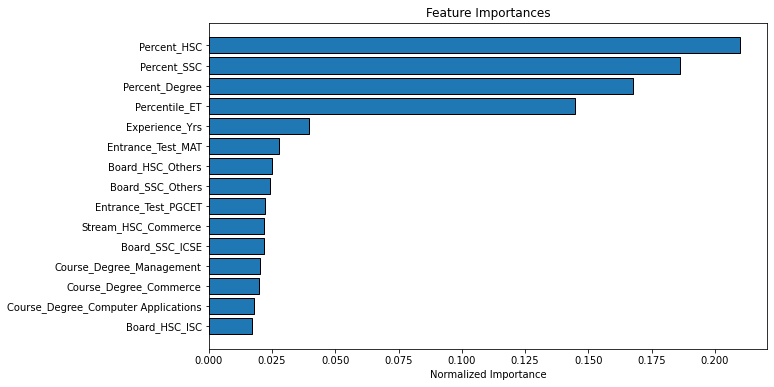

In [70]:
importance = best_rf.feature_importances_
feature = X_train.columns
fi = pd.DataFrame()
fi['importance'] = importance
fi['feature'] = feature
fi_sorted = plot_feature_importances(fi)

In [71]:
from sklearn.model_selection import cross_validate, ShuffleSplit, GridSearchCV
from sklearn.linear_model import LogisticRegressionCV, SGDClassifier
from sklearn import ensemble, naive_bayes, svm, tree, discriminant_analysis, neighbors, feature_selection

In [73]:
MLA_compare

,MLA Name,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Time
0,LogisticRegressionCV,0.794037,0.807447,0.813157
10,BaggingClassifier,0.794037,0.807447,8.28041
1,SVC,0.796789,0.806383,11.7837
13,RandomForestClassifier,0.838991,0.806383,0.034245
6,BernoulliNB,0.800917,0.804255,0.00305469
4,LinearDiscriminantAnalysis,0.791284,0.8,0.00427275
8,DecisionTreeClassifier,0.826147,0.8,0.00331008
9,AdaBoostClassifier,0.786239,0.795745,27.1471
11,ExtraTreesClassifier,1,0.790426,0.0982204
3,KNeighborsClassifier,1,0.76383,0.00256362


<div class="alert alert-block alert-danger" >
Random Forest performs slightly better than CART, But the best performig model for the data is Logistics RegressionCV. When we have massive data we can opt for a CART   model as the performace is good and also the speed of  computation is faster than Random forest